# Setup
This section contains all codes and presets to setup the notebook.

In [2]:
# Reload all modules at every code execution
%load_ext autoreload
%autoreload 2

In [3]:
# Dataloader
from thenetflixstory.data_processing import load_netflixdata
df_netflix = load_netflixdata()

ModuleNotFoundError: No module named 'thenetflixstory'

In [4]:
# Default Format presets
BAR_FORMATS = {'highlight':{'color':'red'},
          'deemphasize':{'color':'lightgrey'}
          }

FIGURE_FORMATS = {'figsize':(12,6)}

<p align="center">
  <img src="pics/netflix_intro_logo.avif" width="800">
  <br>
  <em>Image: From Thibault Penin on https://unsplash.com/</em>
</p>

# Netflix Unfiltered - What Content Ratings and Genres Reveal About the Platform's Evolution

## Intro - Our Research Question
Over the years, Netflix has shifted from a family-friendly catalog to a platform dominated by mature content. We explore how content rating, genre, country, and format changed - and what this reveals about its evolving strategy.

TODO: Set expectations (what trends or questions will be explored -> Lead)

## Explain the data source (Netflix dataset)
TODO... 

Justification for Data Range (2010–2021)

While the dataset contains content released before 2010, we chose to concentrate on the period from 2010 to 2021 to ensure relevance and clarity. Earlier data is sparse and often includes legacy titles that were added retroactively to the platform, rather than representing Netflix’s active content strategy. By focusing on the modern streaming era, we capture the period where Netflix evolved from a content distributor to a global producer — a shift that directly impacted the platform’s catalog composition, genre focus, and audience targeting.

## Graph1 (Sven) - Growth by Age Rating
Shows how TV-MA and R-related content exploted post-2015

STORY:

Chart 1: Rating Evolution Over Time

How Netflix Grew Up: The Rise of Mature Content

From 2010 to 2020, Netflix’s content strategy underwent a major transformation. This stacked area chart shows how age ratings evolved in absolute numbers — and the shift is undeniable. While general and PG-rated content remained relatively flat, mature ratings like TV-MA and R began surging after 2015, rapidly becoming the dominant share of annual releases. This shift suggests not just audience diversification, but a deliberate pivot toward adult-oriented content. The use of a stacked area chart makes the growth visually tangible — TV-MA isn’t just a bigger part of the stack; it’s now the tallest layer. By mapping volume over time, we establish the foundation for Netflix’s content "maturation".

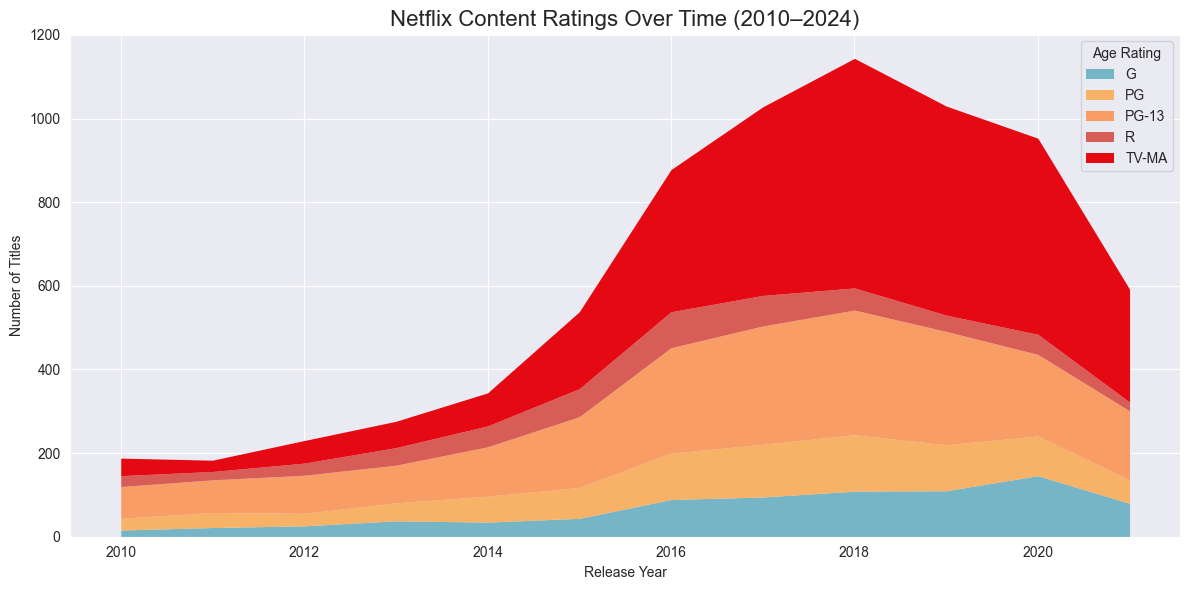

'\nWe observe a significant rise in TV-MA content after 2015, suggesting a deliberate\nshift towards adult-oriented shows. The number of family-friendly titles (G/PG)\nremains relatively flat, while mature content (TV-MA, R) now dominates the catalog.\n'

In [ ]:
# 📈 Chart 1: Rating Evolution Over Time (Stacked Area Chart)
# ------------------------------------------------------------
# This notebook shows how Netflix's target audience has changed over time,
# focusing on how the number of titles in different age categories evolved.


# 🧾 Section 1: Introduction
"""
Netflix began as a family-friendly platform, but over time, its content strategy
has matured. To explore this shift, we analyze how the number of titles in each
age rating category (e.g., TV-MA, PG, R) evolved from 2010 to 2024.
"""


# 📦 Section 2: Imports & Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (12, 6)


# 🎬 Section 3: Load and Inspect Data
df = pd.read_csv("../data/netflix1.csv")
df.head()


# 🔍 Section 4: Preprocessing - Clean Ratings and Years
# Keep only rows with valid release years and ratings
df = df[df['release_year'].notna() & df['rating'].notna()]
df['release_year'] = df['release_year'].astype(int)


# Filter to focus on modern streaming years (e.g., 2010+)
df = df[df['release_year'] >= 2010]


# Simplify ratings to standard categories (group variations)
rating_map = {
'TV-G': 'G', 'G': 'G',
'TV-Y': 'G', 'TV-Y7': 'G',
'PG': 'PG', 'TV-PG': 'PG',
'PG-13': 'PG-13',
'R': 'R', 'TV-14': 'PG-13',
'NC-17': 'R', 'TV-MA': 'TV-MA'
}
df['simple_rating'] = df['rating'].map(rating_map)
df = df[df['simple_rating'].notna()]


# 🧮 Section 5: Prepare Data for Plotting
rating_by_year = df.groupby(['release_year', 'simple_rating']).size().unstack(fill_value=0)


# Sort rating categories for visual consistency
rating_order = ['G', 'PG', 'PG-13', 'R', 'TV-MA']
rating_by_year = rating_by_year[rating_order]


# 🎨 Section 6: Plotting - Stacked Area Chart
rating_by_year.plot.area(
    color=["#76b5c5", "#f7b267", "#f79d65", "#d85d56", "#e50914"],  # Netflix-themed
    linewidth=0,
)


plt.title("Netflix Content Ratings Over Time (2010–2020)", fontsize=16)
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.legend(title="Age Rating")
plt.tight_layout()
plt.show()


# 📌 Section 7: Interpretation
"""
We observe a significant rise in TV-MA content after 2015, suggesting a deliberate
shift towards adult-oriented shows. The number of family-friendly titles (G/PG)
remains relatively flat, while mature content (TV-MA, R) now dominates the catalog.
"""


## Graph2 (Sven) - Composition by Rating
Confirms the shift: mature content now dominates share.


Chart 2: Composition of Age Ratings by Year

From G to TV-MA: How Netflix’s Library Aged

While raw title counts show growth, they don’t reveal structural change. This normalized stacked bar chart makes that shift clear: Netflix’s catalog has gradually aged. By showing each year’s composition as 100%, we can see how the proportion of G and PG content shrinks — squeezed out by the growing share of PG-13, R, and especially TV-MA. Around 2016, the composition visibly tips: TV-MA becomes the single largest slice. Using normalization lets us decouple volume from structure, confirming that Netflix didn't just add more content — it changed what kind of content it prioritized.

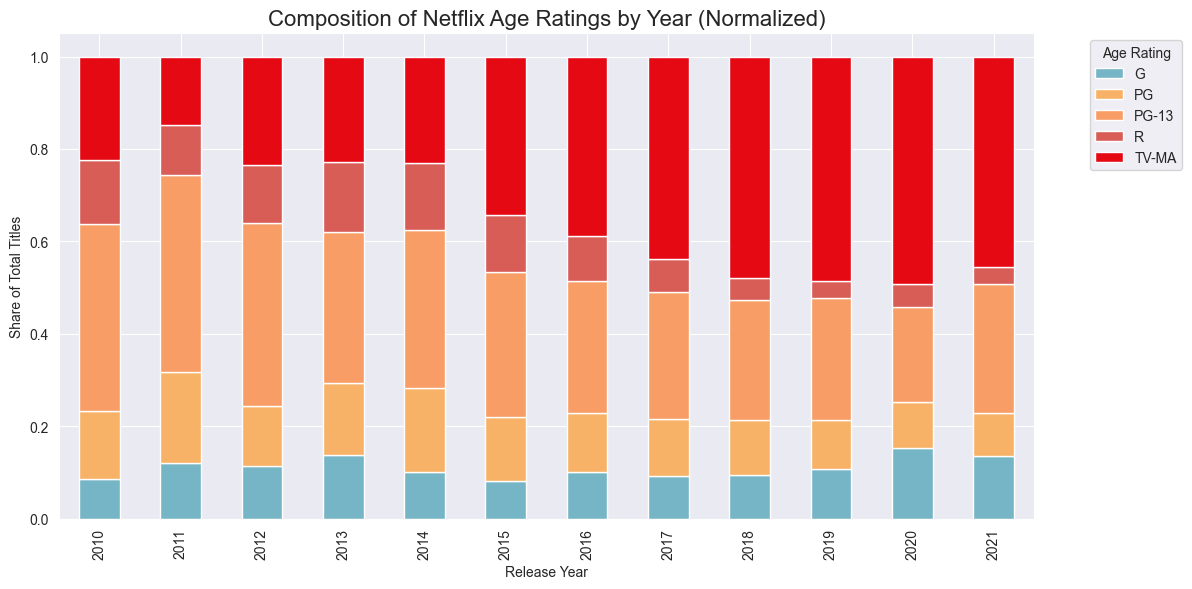

'\nThis normalized chart confirms the trend: mature-rated content (especially TV-MA)\nhas become the majority share of Netflix releases in recent years. Family content,\non the other hand, has decreased proportionally, even if the raw count stayed flat.\n'

In [12]:
# 📦 Section 2: Imports & Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (12, 6)


# 🎬 Section 3: Load and Inspect Data
df = pd.read_csv("../data/netflix1.csv")
df.head()


# 🔍 Section 4: Preprocessing - Clean Ratings and Years
# Keep only rows with valid release years and ratings
df = df[df['release_year'].notna() & df['rating'].notna()]
df['release_year'] = df['release_year'].astype(int)


# Filter to focus on modern streaming years (e.g., 2010+)
df = df[df['release_year'] >= 2010]


# Simplify ratings to standard categories (group variations)
rating_map = {
'TV-G': 'G', 'G': 'G',
'TV-Y': 'G', 'TV-Y7': 'G',
'PG': 'PG', 'TV-PG': 'PG',
'PG-13': 'PG-13',
'R': 'R', 'TV-14': 'PG-13',
'NC-17': 'R', 'TV-MA': 'TV-MA'
}
df['simple_rating'] = df['rating'].map(rating_map)
df = df[df['simple_rating'].notna()]


# 🧮 Section 5: Prepare Data for Plotting
rating_by_year = df.groupby(['release_year', 'simple_rating']).size().unstack(fill_value=0)


# Sort rating categories for visual consistency
rating_order = ['G', 'PG', 'PG-13', 'R', 'TV-MA']
rating_by_year = rating_by_year[rating_order]




# 📊 Chart 2: Composition of Age Ratings Over Time (Normalized Stacked Bar)
# -------------------------------------------------------------------------
"""
While the absolute number of titles increased, the composition of age categories
has also shifted significantly. This chart shows the *proportion* of each rating
per year, highlighting how the catalog matured structurally.
"""


# 🧮 Prepare normalized data for Chart 2
rating_by_year_norm = rating_by_year.div(rating_by_year.sum(axis=1), axis=0)


# 🎨 Plotting - Normalized Stacked Bar Chart (Chart 2)
rating_by_year_norm.plot(
kind="bar",
stacked=True,
color=["#76b5c5", "#f7b267", "#f79d65", "#d85d56", "#e50914"]
)


plt.title("Composition of Netflix Age Ratings by Year (Normalized)", fontsize=16)
plt.xlabel("Release Year")
plt.ylabel("Share of Total Titles")
plt.legend(title="Age Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 📌 Section 8: Interpretation (Chart 2)
"""
This normalized chart confirms the trend: mature-rated content (especially TV-MA)
has become the majority share of Netflix releases in recent years. Family content,
on the other hand, has decreased proportionally, even if the raw count stayed flat.
"""

## Graph3 (Sven) Genre vs Rating
Reveals that Drama, Thriller, HOrror = mature, Kids, Family = G/PG

Chart 3: Genre vs. Age Rating (Heatmap)

Genres Grow Up Too: Mapping Maturity by Genre

Genres don’t just entertain — they signal intended audiences. This heatmap cross-references genres with age ratings, revealing how Drama, Thriller, and Horror are saturated with TV-MA and R content. In contrast, genres like Animation, Kids, and Family are clearly aligned with G and PG ratings. This visual snapshot emphasizes how genre choice shapes — and reflects — maturity. We removed numerical annotations to let the color intensity speak for itself, guiding the reader’s focus to the stark genre divide. This chart supports the broader argument: Netflix’s maturing library isn’t random — it’s structured, intentional, and genre-aligned.

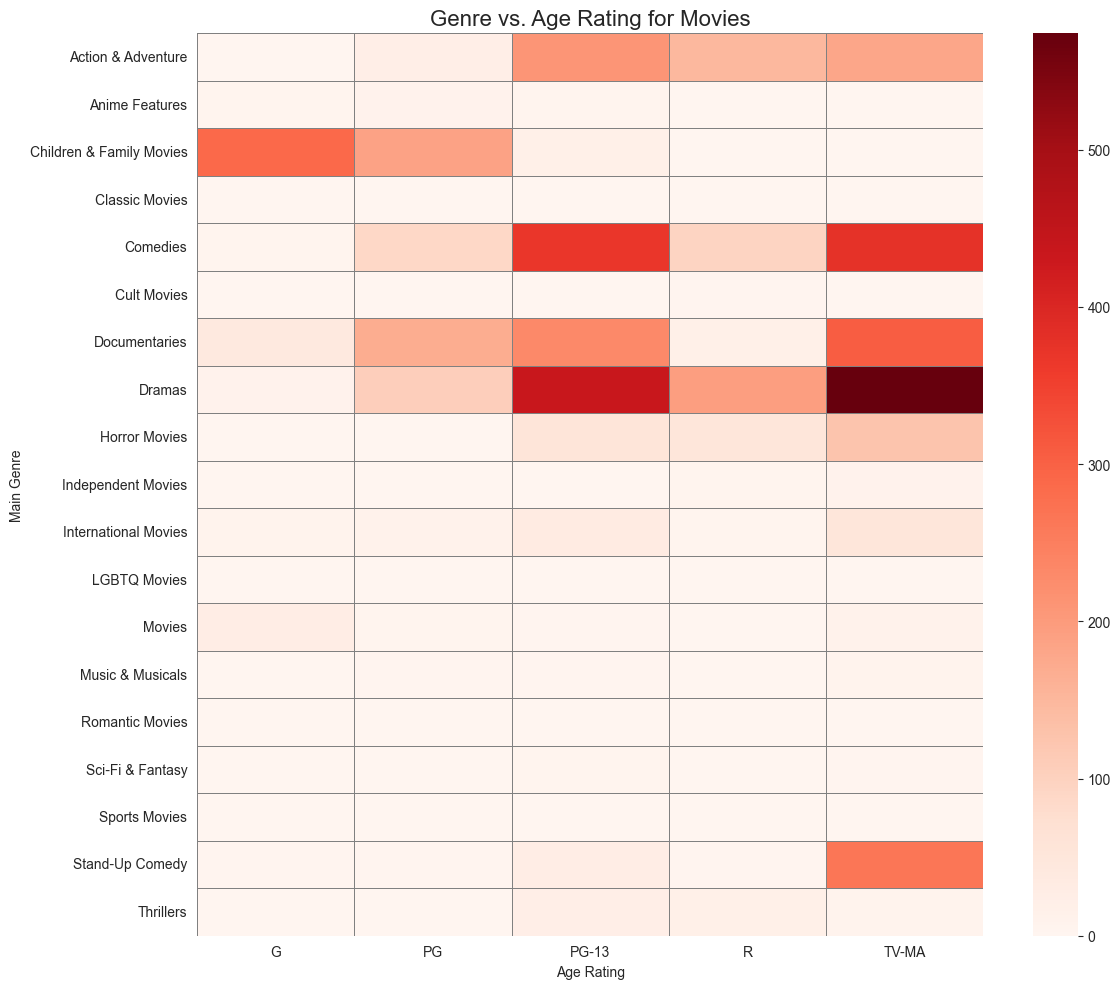

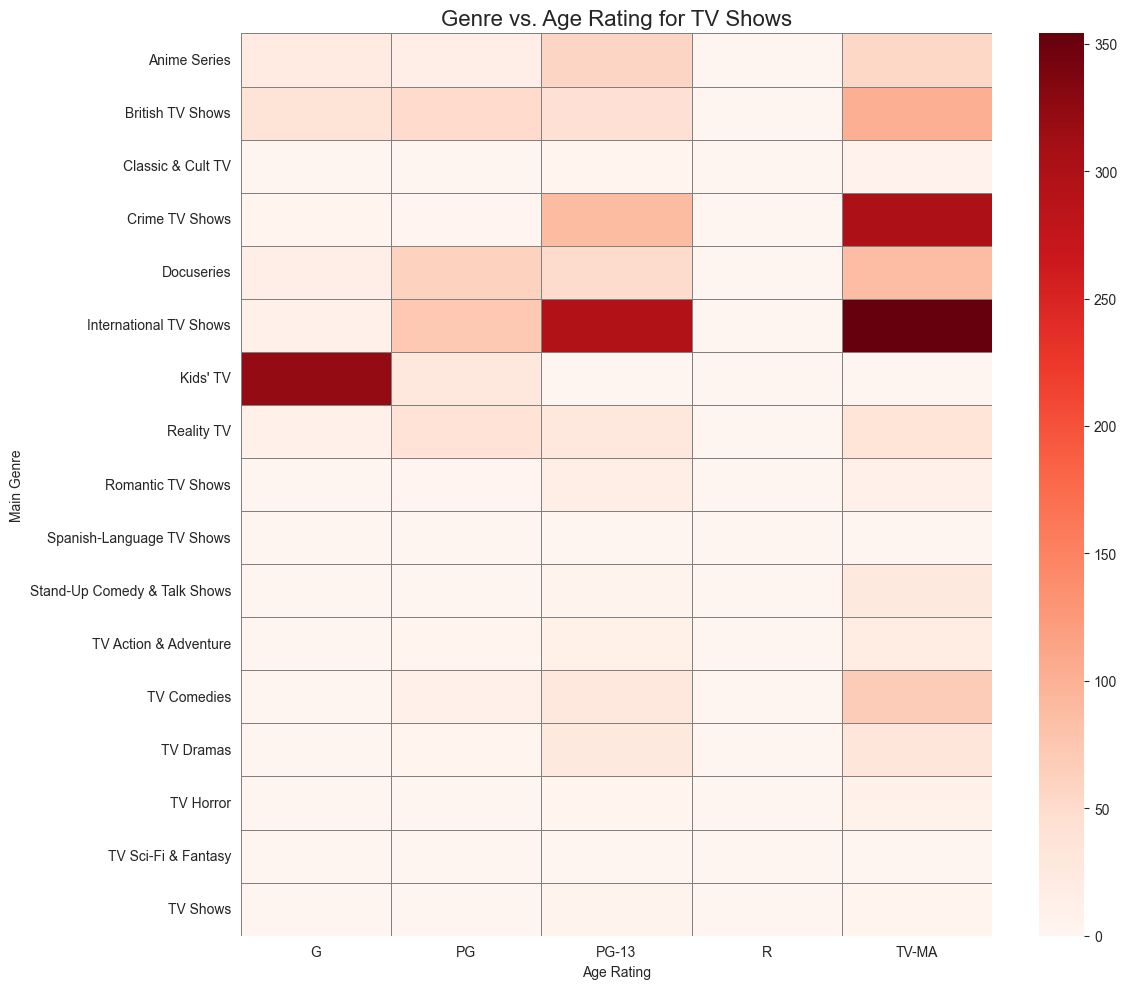

In [13]:
# 📦 Imports & Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (12, 10)

# 📥 Load the data
df = pd.read_csv("../data/netflix1.csv")

# 🧹 Preprocessing: Clean years and ratings
df = df[df['release_year'].notna() & df['rating'].notna()]
df['release_year'] = df['release_year'].astype(int)
df = df[df['release_year'] >= 2010]

# Simplify ratings to standard categories
rating_map = {
    'TV-G': 'G', 'G': 'G',
    'TV-Y': 'G', 'TV-Y7': 'G',
    'PG': 'PG', 'TV-PG': 'PG',
    'PG-13': 'PG-13', 'TV-14': 'PG-13',
    'R': 'R', 'NC-17': 'R',
    'TV-MA': 'TV-MA'
}
df['simple_rating'] = df['rating'].map(rating_map)
df = df[df['simple_rating'].notna()]

# Extract main genre
df['main_genre'] = df['listed_in'].str.split(',').str[0].str.strip()
df = df[df['main_genre'].notna()]

# Define consistent rating order
rating_order = ['G', 'PG', 'PG-13', 'R', 'TV-MA']

# 📊 Plotting function: Genre × Age Rating heatmap per content type
def plot_genre_rating_heatmap(content_type):
    subset = df[df['type'] == content_type]
    
    # Create crosstab of genres × simplified ratings (raw counts)
    genre_rating_crosstab = pd.crosstab(
        subset['main_genre'],
        subset['simple_rating']
    )

    # Keep only desired rating columns
    genre_rating_crosstab = genre_rating_crosstab.reindex(columns=rating_order, fill_value=0)

    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        genre_rating_crosstab,
        cmap="Reds",
        annot=False,              # No text in cells
        linewidths=0.5,
        linecolor='gray'
    )
    plt.title(f"Genre vs. Age Rating for {content_type}s", fontsize=16)
    plt.xlabel("Age Rating")
    plt.ylabel("Main Genre")
    plt.tight_layout()
    plt.show()

# 🔥 Plot for Movies
plot_genre_rating_heatmap("Movie")

# 📺 Plot for TV Shows
plot_genre_rating_heatmap("TV Show")

## Graph4 (Boris) - Top Countries by Mature Titles
TODO: Which regions are leading to shift to TV-MA?

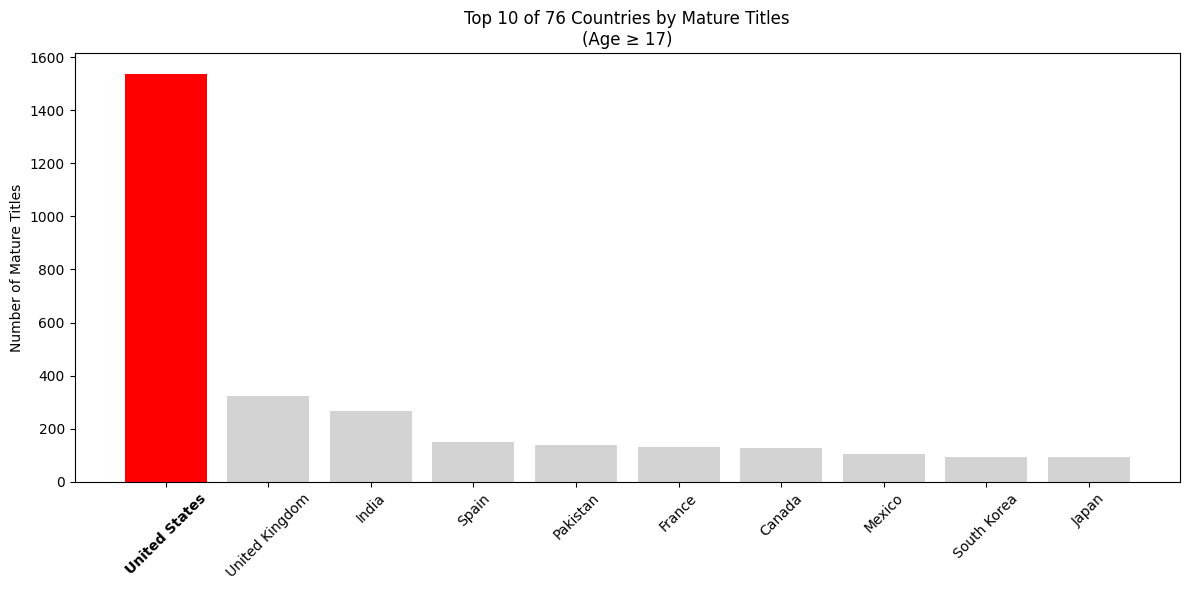

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# ---- Mature-Filter ----
AGE_FILTER = 17
TOP_N_COUNTRIES = 10

df_mature = df_netflix.query('rating_age >= @AGE_FILTER')

# ---- Länder zählen ----
country_counts = (
    df_mature['country_clean']
    .value_counts()
    .head(TOP_N_COUNTRIES)  # Top 10
)

# ---- Farben definieren ----
colors = [BAR_FORMATS['highlight']['color']] + [BAR_FORMATS['deemphasize']['color']] * (len(country_counts) - 1)

# ---- Plot ----
fig, ax = plt.subplots(**FIGURE_FORMATS)
bars = ax.bar(country_counts.index, country_counts.values, color=colors)

# ---- Titel ----
total_n_countries = len(df_mature['country_clean'].unique())
ax.set_title(
    f"Top {TOP_N_COUNTRIES} of {total_n_countries} Countries by Mature Titles\n(Age ≥ {AGE_FILTER})"
)

ax.set_xlabel("")
ax.set_ylabel("Number of Mature Titles")
ax.tick_params(axis='x', rotation=45)

# ---- Top-Country Label fett machen ----
for tick_label in ax.get_xticklabels():
    if tick_label.get_text() == country_counts.index[0]:  # erstes Land
        tick_label.set_fontweight('bold')

plt.tight_layout()
plt.show()


Über alles gesehen dominieren die United States zweifelsohne die Produktion der Mature/Adult Filme. Dies beeinflusst das Netflix-Universum auf jeden Fall sehr stark im Bereich Mature-Content. Aber liegt das wirklich einfach daran, dass Holywood sich strategisch eher auf älteres Publikum fokussiert?

In [109]:
import plotly.express as px

# Datensatz filtern
min_age = 17
df_mature = df_netflix.query('rating_age >= @min_age')
df_mature_exp = df_mature.explode('genres_list')

# Nur gültige Einträge
df_mature_exp = df_mature_exp.dropna(subset=["country", "genres_list"])

# Top-Land bestimmen
country_counts = df_mature_exp['country'].value_counts()
top_country = country_counts.index[0]
total_titles = country_counts.sum()

# Anteil berechnen
country_percent = (country_counts / total_titles * 100).round(1)

# Optional: neues Label mit Anteil erstellen
df_mature_exp['country_label'] = df_mature_exp['country'].apply(
    lambda c: f"{c} ({country_percent[c]}%)" if c in country_percent else c
)

# Farbdict erstellen
color_map = {c: "rgb(220,0,0)" if c == top_country else "rgb(180,180,180)"
             for c in df_mature_exp["country"].unique()}

fig = px.treemap(
    df_mature_exp,
    path=["country_label", "genres_list"],
    color="country",
    color_discrete_map=color_map,
    title=f"Mature Titles Per Country (min. age > {min_age} years old)"
)

# Top-Country fett darstellen
fig.update_traces(
    texttemplate="%{label}",  # Label bleibt gleich
    selector=dict(type='treemap')
)

# Labels fett für das Top-Country
# Dazu kann man in df_mature_exp ein spezielles HTML-Tag verwenden
df_mature_exp['country_label_html'] = df_mature_exp['country_label'].apply(
    lambda x: f"<b>{x}</b>" if top_country in x else x
)

fig = px.treemap(
    df_mature_exp,
    path=["country_label_html", "genres_list"],
    color="country",
    color_discrete_map=color_map,
    title=f"Mature Titles Per Country (min. age ≥ {min_age} years old)"
)

fig.update_traces(
    textinfo="label+value+percent parent",
)

fig.show()


### Popcorn or Popporn?
If you search the Netflix database for the keyword “sex,” a total of 18 titles appear, all of which are classified under harmless genres such as comedies, dramas, reality TV, etc. Interested readers should note at this point that there is a significant difference between “mature content” and “adult content.” The latter category does not seem to fit with Netflix's strategy and, interestingly, is not offered at all.

### On the trail of explicit language, sex, and dark humor
Let's search for well-known titles that may be US mature content but are rated FSK>18.
The search for often ambiguous animated films such as “South Park,” but also "Deadpool" or “The Wolf of Wall Street” are not even included in the Netflix database.

A quick search for suspicious movie titles then gives us the following hits:
| Title                         | US-Rating (MAA)                  | FSK-Rating |
|-------------------------------|----------------------------------|------------|
| Zack and Miri Make a Porno    | R - Restricted Mature/Adult      | FSK-16     |
| American Pie 9: Girls' Rules  | R - Restricted Mature/Adult      | FSK-15     |
| Superbad                      | R - Restricted Mature/Adult      | FSK-16     |
| ...                           | ...                              | ...        |

(R* = ages 17 and up, only permitted with parents)


This shows that...  
a) on the one hand, Titles in the Netflix database are classified using a unified, predominantly US-oriented rating scheme rather than the original regional rating systems.  
b) Within a unified, US-oriented rating framework, US comedy titles are classified as non-youth-rated significantly more often than comparable titles from other countries. This suggests that either US comedies more frequently contain elements that trigger restrictive classifications, or that the rating system is particularly sensitive to stylistic features prevalent in US comedy.


This pattern may contribute to the perception of a paradox between restrictive classification practices and the prevalence of mature-themed comedy in US productions: **hypocritical prudery is refuted by reality.**. However, this interpretation goes beyond what can be directly inferred from rating data alone.


In [103]:
candidate_titles = [ #friendly provided by ChatGPT for this purpose
    "superbad",
    "40-year-old virgin",
    "40 year old virgin",
    "american pie",
    "wedding crashers",
    "knocked up",
    "hall pass",
    "forgetting sarah marshall",
    "zack and miri",
    "american wedding",
    "american pie 2"
]

pattern = "|".join(candidate_titles)

df_candidates = df_netflix[
    df_netflix['title']
    .str.lower()
    .str.contains(pattern, regex=True, na=False)
]
df_candidates[['title','rating','country']]

,title,rating,country
988,Zack and Miri Make a Porno,R,United States
1612,American Pie 9: Girls' Rules,R,United States
5974,Superbad,R,United States


Prozentuale Mature-Titel nach Land und Genre:


/tmp/ipykernel_26077/1387983396.py:18: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/tmp/ipykernel_26077/1387983396.py:18: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/tmp/ipykernel_26077/1387983396.py:18: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `incl

,Dramas,Independent Movies,Comedies
Other countries,46.3,63.1,35.2
United States,58.6,81.9,39.1


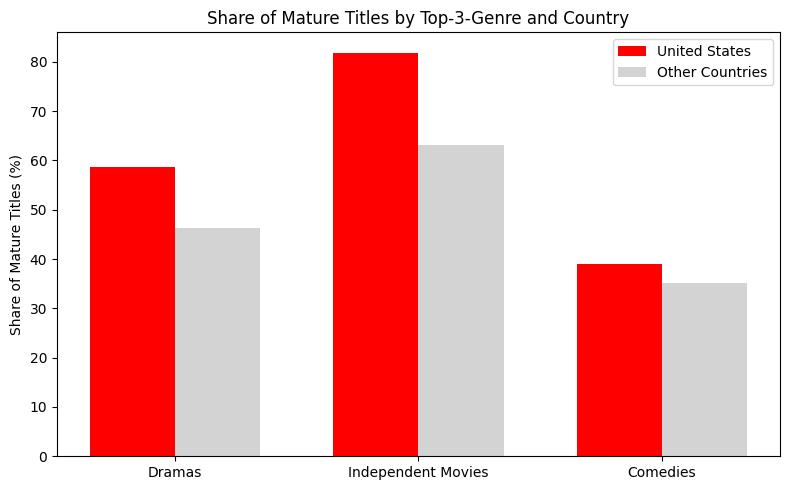

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Genres of interest
genres_of_interest = ['Dramas', 'Independent Movies', 'Comedies']

# Flags für jedes Genre
for genre in genres_of_interest:
    df_netflix[genre] = df_netflix['genres_list'].apply(lambda g: genre in g if isinstance(g, list) else False)

df_netflix['is_mature'] = df_netflix['rating_age'] >= 17
df_netflix['is_us'] = df_netflix['country_clean'] == 'United States'

# Aggregation: Anteil Mature pro Land und Genre
summary = {}
for genre in genres_of_interest:
    summary[genre] = df_netflix.groupby('is_us').apply(
        lambda x: (x[genre] & x['is_mature']).sum() / x[genre].sum() if x[genre].sum() > 0 else 0
    )

summary = pd.DataFrame(summary)
summary.index = ['Other countries', 'United States']
summary_percent = (summary * 100).round(1)

print("Prozentuale Mature-Titel nach Land und Genre:")
display(summary_percent)

# Plot: je Genre eine Gruppe, zwei Bars pro Genre
n_genres = len(genres_of_interest)
x = np.arange(n_genres)
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))

# Farben setzen
ax.bar(x - width/2, summary_percent.loc['United States'], width, label='United States', color='red')
ax.bar(x + width/2, summary_percent.loc['Other countries'], width, label='Other Countries', color='lightgrey')

ax.set_ylabel('Share of Mature Titles (%)')
ax.set_title('Share of Mature Titles by Top-3-Genre and Country')
ax.set_xticks(x)
ax.set_xticklabels(genres_of_interest)
ax.legend()
plt.tight_layout()
plt.show()


## Graph5 (Boris) - Runtimes by Age Rating
Mature titles tend to be longer, especially TV shows.

/tmp/ipykernel_26077/572521703.py:57: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



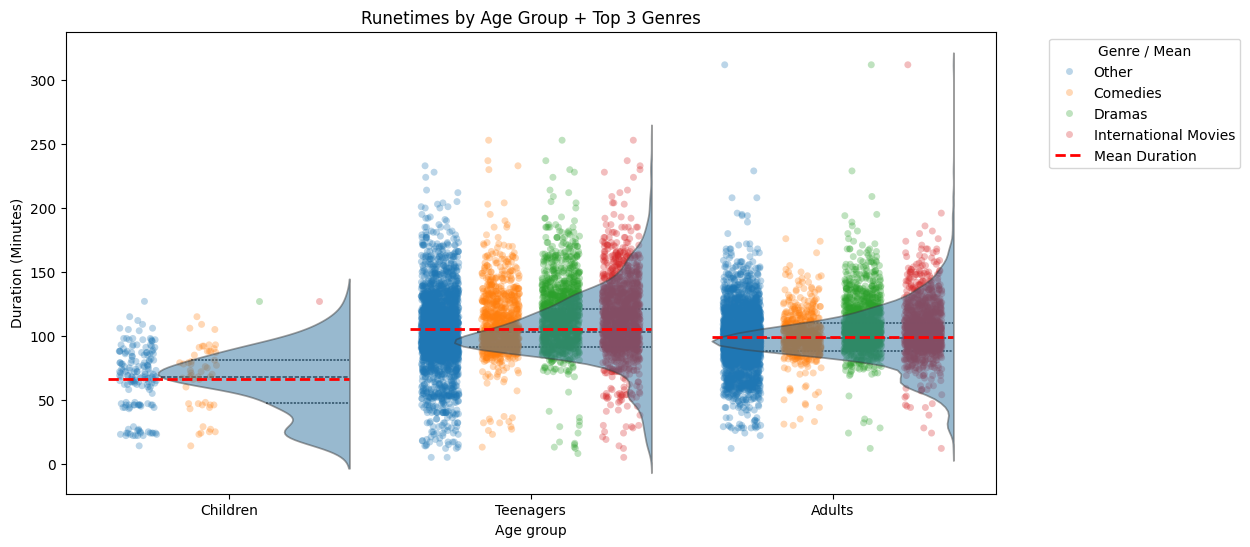

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.lines as mlines

TOP_N_GENRES = 4

df_plot = df_netflix[['type', 'duration_minutes', 'rating_age', 'genres_list','title']].dropna()

bins = [0, 7, 16, 100]  # obere Grenze für Adults großzügig setzen
labels = ['Children', 'Teenagers', 'Adults']

df_plot['age_group'] = pd.cut(df_plot['rating_age'], bins=bins, labels=labels, right=True)
#df_plot['age_group'] = df_plot['rating_age'].apply(lambda r: 'Children' if r<=7 else 'Teenagers' if r<=16 else 'Adults')
age_order = ['Children','Teenagers','Adults']

# Explodieren
#df_plot_exp = df_plot.explode('genres_list')
df_plot_exp = df_plot.explode('genres_list').reset_index(drop=True)

# Top 5 Genres
top_genres = df_plot_exp['genres_list'].value_counts().head(TOP_N_GENRES-1).index.tolist()
df_plot_exp['genre_for_plot'] = df_plot_exp['genres_list'].apply(lambda g: g if g in top_genres else 'Other')

plt.figure(figsize=(12,6))
ax = plt.gca()

# Violinplot nach type
sns.violinplot(
    data=df_plot,
    x='age_group',
    y='duration_minutes',
   # hue='type',
   # palette='pastel',
    order=age_order,
    inner='quartile',
    split=True, #if df_plot['type'].nunique()==2 else False,
    ax=ax,
    alpha=0.5,
    zorder=10
)

# Stripplot nach Genre
sns.stripplot(
    data=df_plot_exp,
    x='age_group',
    y='duration_minutes',
    hue='genre_for_plot',
    dodge=True,
    jitter=0.25,
    size=5,
    alpha=0.3,
    ax=ax
)

# horizontale Linie = Mean pro Altersgruppe
means = df_plot.groupby('age_group')['duration_minutes'].mean()
for i, age in enumerate(age_order):
    ax.hlines(y=means[age], xmin=i-0.4, xmax=i+0.4, color='red', linestyle='--', linewidth=2, zorder=20)


# Legende bereinigen
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title='Genre', bbox_to_anchor=(1.05,1), loc='upper left')

# Manuellen Legendeneintrag für die Mean-Linie hinzufügen
mean_line = mlines.Line2D([], [], color='red', linestyle='--', linewidth=2, label='Mean Duration')
by_label['Mean Duration'] = mean_line

ax.legend(by_label.values(), by_label.keys(), title='Genre / Mean', bbox_to_anchor=(1.05,1), loc='upper left')


plt.ylabel('Duration (Minutes)')
plt.xlabel('Age group')
plt.title(f'Runetimes by Age Group + Top {TOP_N_GENRES-1} Genres')
plt.show()


## Graph6 (Elias) - Genre Popularity by Country
What genres are dominant in U.S., India, UK, Japan?

## TODO: Conclusion
a. Recap key Inisghts. Do not introduce new data - just synthesize
    
Zwischen 2010 und 2024 hat sich das Netflix-Angebot nicht nur mengenmäßig erweitert, sondern auch inhaltlich verändert. Die folgende Grafik zeigt die Entwicklung der Veröffentlichungen nach Altersfreigabe über die Jahre.
Bis etwa 2015 war die Verteilung relativ ausgewogen. Danach jedoch nimmt die Anzahl an Inhalten mit der Altersfreigabe TV-MA und R deutlich zu — parallel zur starken Zunahme an Eigenproduktionen.
Spätestens ab 2020 dominiert TV-MA das Angebot, während familienfreundliche Titel zahlenmäßig stagnieren.
Dieser Wandel ist Ausdruck einer gezielten Strategie: Netflix hat sich mit seinem Publikum weiterentwickelt. Der Chart legt damit das zeitliche Fundament für die folgenden Analysen zu Genre, Ländern und Content-Struktur.